# Car Evaluation Database Project

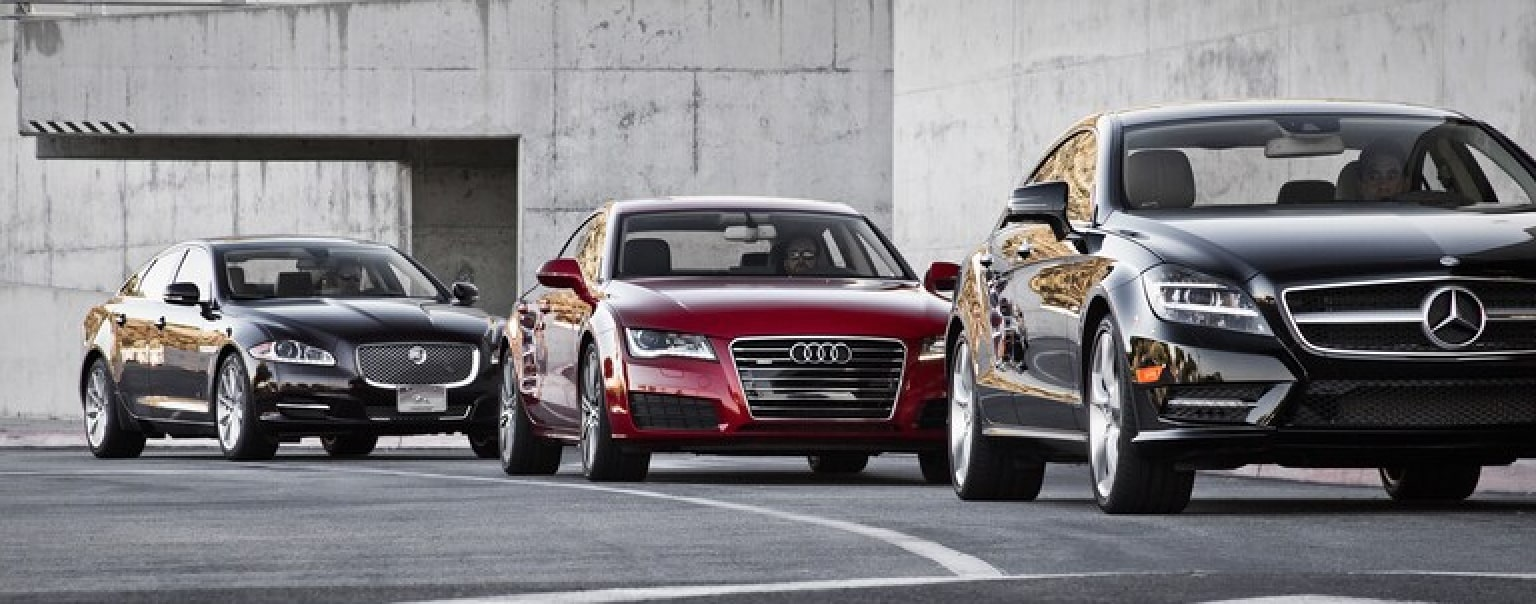

### Business Understanding 

Utilising the provided features of a car from the 'Car Evaluation' dataset to predict it's 'Acceptability Decision' by employing 3 machine learning models; Logistic Regression, Decision Tree and Random Forest. By training the 3 different models, we gain insight into which model delivers the best evaluation metrics and what it considers as the most influential variables towards being acceptable.

Dataset source: (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

### Data Understanding

Importing Libraries and the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report, f1_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.datasets import make_classification
from tabulate import tabulate
from prettytable import PrettyTable

In [2]:
Car_Eval = pd.read_csv('car_evaluation.csv',header=None)

Columns are renamed for readability sakes using .rename

In [3]:
Car_Eval.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
Car_Eval.rename(columns={list(Car_Eval)[0]:'Buying Price',
                         list(Car_Eval)[1]:'Maintenance Cost',
                         list(Car_Eval)[2]:'Number of Doors',
                         list(Car_Eval)[3]:'Number of People',
                         list(Car_Eval)[4]:'Luggage Boot',
                         list(Car_Eval)[5]:'Safety',
                         list(Car_Eval)[6]:'Acceptability Decision'
                        }, inplace=True)
Car_Eval

,Buying Price,Maintenance Cost,Number of Doors,Number of People,Luggage Boot,Safety,Acceptability Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Exploratory Data Analysis

Checking for null values within the dataset using .info

In [5]:
Car_Eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Buying Price            1728 non-null   object
 1   Maintenance Cost        1728 non-null   object
 2   Number of Doors         1728 non-null   object
 3   Number of People        1728 non-null   object
 4   Luggage Boot            1728 non-null   object
 5   Safety                  1728 non-null   object
 6   Acceptability Decision  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


1. 1728 datapoints with 6 columns (features) and 1 target column.
2. Data set contains categorical features.
3. There are no missing values in the dataset.

Feature Engineering using label encoding to convert categorical features into the appropiate form

In [6]:
for i in Car_Eval.columns:
    Car_Eval[i]=lb.fit_transform(Car_Eval[i])

Car_Eval

,Buying Price,Maintenance Cost,Number of Doors,Number of People,Luggage Boot,Safety,Acceptability Decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


Converting to ordered numerical values as well as changing the target variable to binary values

In [7]:
Car_Eval['Buying Price'].replace([1, 2, 0, 3], [3, 2, 1, 0], inplace=True)
Car_Eval['Maintenance Cost'].replace([1, 2, 0, 3], [0, 1, 2, 3], inplace=True)
Car_Eval['Number of Doors'].replace([3, 2, 1, 0], [3, 2, 1, 0], inplace=True)
Car_Eval['Number of People'].replace([2, 1, 0], [2, 1, 0], inplace=True)
Car_Eval['Luggage Boot'].replace([0, 1, 0], [2, 1, 0], inplace=True)
Car_Eval['Safety'].replace([1, 2, 0], [0, 1, 2], inplace=True)
Car_Eval['Acceptability Decision'].replace([2, 0, 1, 3], [0, 1, 1, 1], inplace=True)
Car_Eval

,Buying Price,Maintenance Cost,Number of Doors,Number of People,Luggage Boot,Safety,Acceptability Decision
0,0,3,0,0,2,0,0
1,0,3,0,0,2,1,0
2,0,3,0,0,2,2,0
3,0,3,0,0,1,0,0
4,0,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,0,3,2,1,1,1
1724,3,0,3,2,1,2,1
1725,3,0,3,2,0,0,0
1726,3,0,3,2,0,1,1


### Visualisating the dataset

Text(0, 0.5, 'Count')

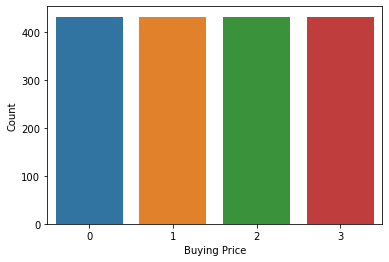

In [8]:
sns.countplot(data = Car_Eval, x = 'Buying Price')
plt.xlabel('Buying Price')
plt.ylabel('Count')

Similar trend seen across all features except for 'Acceptability Decision'

Text(0, 0.5, 'Count')

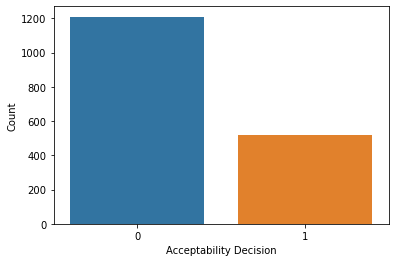

In [9]:
sns.countplot(data = Car_Eval, x = 'Acceptability Decision')
plt.xlabel('Acceptability Decision')
plt.ylabel('Count')

Count of 'Buying Price' for 'Acceptability Decision'

/Users/AminKhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


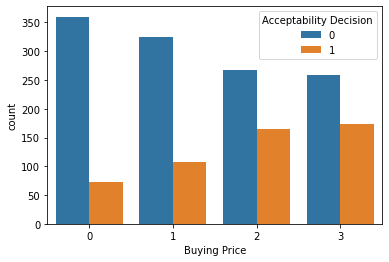

In [10]:
sns.countplot(Car_Eval['Buying Price'], hue = Car_Eval['Acceptability Decision'])
plt.show()

Count of 'Number of People' for 'Acceptability Decision'

/Users/AminKhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


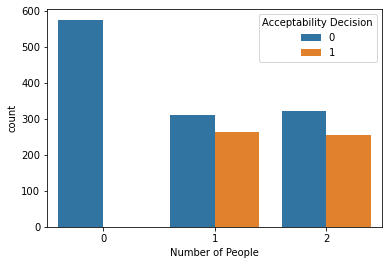

In [11]:
sns.countplot(Car_Eval['Number of People'], hue = Car_Eval['Acceptability Decision'])
plt.show()

Count of 'Safety' for 'Acceptability Decision'

/Users/AminKhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


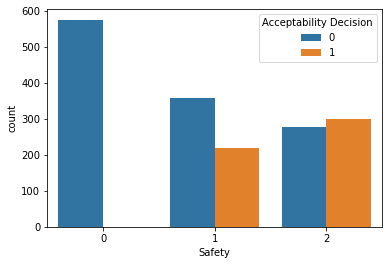

In [12]:
sns.countplot(Car_Eval['Safety'], hue = Car_Eval['Acceptability Decision'])
plt.show()

Visualisation of the dataset shows the importance of 'Number of People' and 'Safety' in 'Acceptability Decision' as no cars were accepted for 0 in each case.

### Splitting Dataset

The target feature, 'Acceptability Decision', is dropped.

In [13]:
X = Car_Eval.drop(['Acceptability Decision'],axis=1)
y= Car_Eval['Acceptability Decision']
X,y=X.astype(int), y.astype(int)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. Test:Train set in a 30:70 split
2. X_train: we do fit_transform because we need to compute mean and std, and then use it to autoscale the data. 
3. X_test: we already have the mean and std, so we only do the transform part.

The data is scaled such that its distribution will have a mean value 0 and standard deviation of 1.
This is a requirement before implementeing any ML model as they might behave badly if the individual features do not more or less look like standard normally distributed data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Fitting logreg to the train set

In [17]:
log_model.fit(scaledX_train,y_train)

LogisticRegression()

Making predictions and evaluating performance

In [18]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
y_pred = log_model.predict(scaledX_test)

In [19]:
y_pred_train = log_model.predict(scaledX_train)

Classification Report

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       374
           1       0.73      0.76      0.74       145

    accuracy                           0.85       519
   macro avg       0.82      0.82      0.82       519
weighted avg       0.86      0.85      0.85       519



In [21]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       836
           1       0.81      0.76      0.79       373

    accuracy                           0.87      1209
   macro avg       0.86      0.84      0.85      1209
weighted avg       0.87      0.87      0.87      1209



Confusion Matrix

The number of correct and incorrect predictions are summed up class-wise. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 333 and 110 are actual predictions, and 35 and 41 are incorrect predictions.

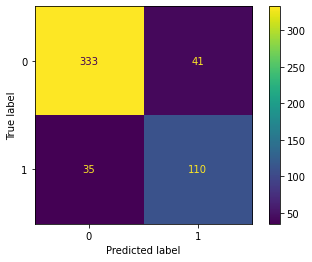

In [22]:
plot_confusion_matrix(log_model,scaledX_test,y_test)

ROC Curve: True positive rate against the false positive rate.

It describes how good the model is at predicting the positive class when the actual outcome is positive - a value 0.93 demonstrates a good classifying model

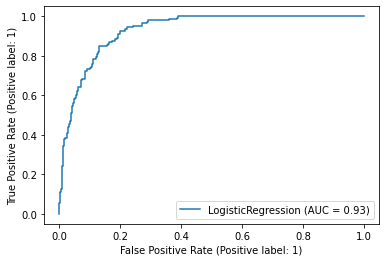

In [23]:
plot_roc_curve(log_model, scaledX_test, y_test)

Coefficient Scores

Coefficient scores show 'Safety' and 'Number of People' as most influential on 'Acceptability Decision'

In [24]:
log_model.coef_

array([[ 0.94916827, -0.76930941,  0.28633215,  1.90880254, -0.51688535,
         2.1953053 ]])

In [25]:
coefs = pd.Series(index=X_train.columns,data=log_model.coef_[0])

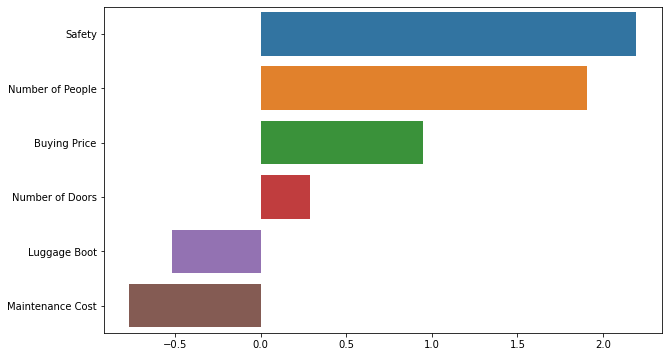

In [26]:
coefs = coefs.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=coefs.index,x=coefs.values);

### Decision Tree

Defining evaluation metrics

In [27]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
 
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))

  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))

  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))

  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))


Instantiate a DecisionTree classifier with inputted parameter values

In [28]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 5,random_state = 101)
dt.fit(X_train,y_train)

yp_train = dt.predict(X_train)
yp_test = dt.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       836
           1       0.94      0.86      0.89       373

    accuracy                           0.94      1209
   macro avg       0.94      0.92      0.93      1209
weighted avg       0.94      0.94      0.94      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       374
           1       0.87      0.84      0.86       145

    accuracy                           0.92       519
   macro avg       0.91      0.90      0.90       519
weighted avg       0.92      0.92      0.92       519

Accuracy on Train Data is: 0.94
Accuracy on Test Data is: 0.92
Precision on Train Data is: 0.94
Precision on Test Data is: 0.92
Recall on Train Data is: 0.94
Recall on Test Data is: 0.92
F1 Score on Train Data is: 0.94
F1 Score on Test Data is: 0.92


In [29]:
print(confusion_matrix(y_test, yp_test))

[[356  18]
 [ 23 122]]


In the output, 356 and 122 are actual predictions, and 23 and 18 are incorrect predictions.

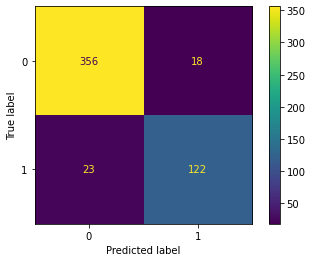

In [30]:
plot_confusion_matrix(dt, X_test, y_test)

ROC Curve: True positive rate against the false positive rate.

It describes how good the model is at predicting the positive class when the actual outcome is positive - a value 0.97 demonstrates a good classifying model

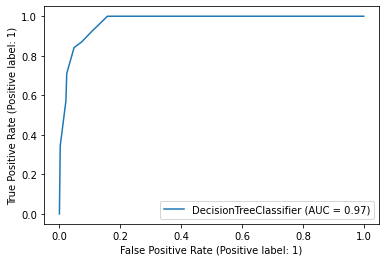

In [31]:
plot_roc_curve(dt, X_test, y_test)

Feature Scores

Feature scores show 'Safety' and 'Number of People' as most influential on 'Acceptability Decision'

In [32]:
feature_scores = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Number of People    0.407094
Safety              0.282796
Maintenance Cost    0.139833
Buying Price        0.116580
Luggage Boot        0.040967
Number of Doors     0.012730
dtype: float64

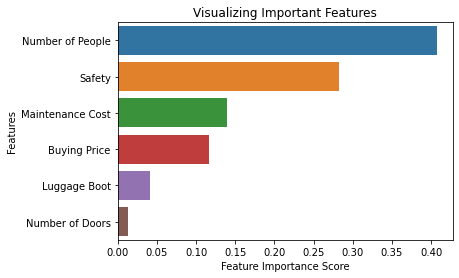

In [33]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Decision Tree Plot

In [34]:
plt.figure(figsize=(12,8),dpi=1000)

from sklearn import tree

tree.plot_tree(dt.fit(X_train, y_train)) 

[Text(3487.5, 5536.666666666667, 'X[5] <= 0.5\ngini = 0.427\nsamples = 1209\nvalue = [836, 373]'),
 Text(2906.25, 4530.0, 'gini = 0.0\nsamples = 409\nvalue = [409, 0]'),
 Text(4068.75, 4530.0, 'X[3] <= 0.5\ngini = 0.498\nsamples = 800\nvalue = [427, 373]'),
 Text(3487.5, 3523.3333333333335, 'gini = 0.0\nsamples = 262\nvalue = [262, 0]'),
 Text(4650.0, 3523.3333333333335, 'X[0] <= 1.5\ngini = 0.425\nsamples = 538\nvalue = [165, 373]'),
 Text(2325.0, 2516.666666666667, 'X[1] <= 1.5\ngini = 0.499\nsamples = 267\nvalue = [139, 128]'),
 Text(1162.5, 1510.0, 'X[4] <= 1.5\ngini = 0.336\nsamples = 131\nvalue = [28, 103]'),
 Text(581.25, 503.33333333333394, 'gini = 0.107\nsamples = 88\nvalue = [5, 83]'),
 Text(1743.75, 503.33333333333394, 'gini = 0.498\nsamples = 43\nvalue = [23, 20]'),
 Text(3487.5, 1510.0, 'X[1] <= 2.5\ngini = 0.3\nsamples = 136\nvalue = [111, 25]'),
 Text(2906.25, 503.33333333333394, 'gini = 0.471\nsamples = 66\nvalue = [41, 25]'),
 Text(4068.75, 503.33333333333394, 'gini = 

### Random Forest

Instantiate a RandomForest classifier with inputted parameter values

In [35]:
rf_model = RandomForestClassifier(random_state=101, n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=101)

In [36]:
rf_training_pred = rf_model.predict(X_train)
print('Accuracy Score for training data = ' + str(round(accuracy_score(y_train, rf_training_pred), 4) * 100) + '%')

Accuracy Score for training data = 100.0%


In [37]:
rf_testing_pred = rf_model.predict(X_test)
print('Accuracy Score for testing data = ' + str(round(accuracy_score(y_test, rf_testing_pred), 4) * 100) + '%')

Accuracy Score for testing data = 98.27%


Confusion Matrix 

In [38]:
print(confusion_matrix(y_test, rf_testing_pred))

[[368   6]
 [  3 142]]


In the output, 368 and 142 are actual predictions, and 3 and 6 are incorrect predictions.

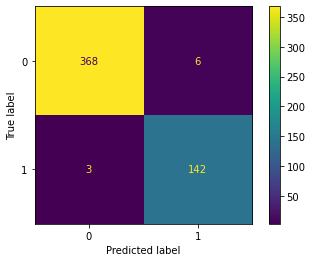

In [39]:
plot_confusion_matrix(rf_model, X_test, y_test)

Classification Report

In [40]:
print(classification_report(y_test, rf_testing_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       374
           1       0.96      0.98      0.97       145

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [41]:
print(classification_report(y_train, rf_training_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



ROC Curve: True positive rate against the false positive rate.

It describes how good the model is at predicting the positive class when the actual outcome is positive - a value 1.00 demonstrates a perfect classifying model

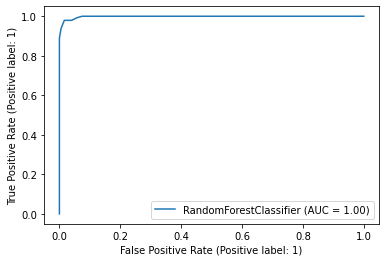

In [42]:
plot_roc_curve(rf_model, X_test, y_test)

Feature Scores

Feature scores show 'Safety' and 'Number of People' as most influential on 'Acceptability Decision'

In [43]:
feature_scores_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_rf

Number of People    0.347083
Safety              0.342998
Buying Price        0.110925
Maintenance Cost    0.097944
Luggage Boot        0.061954
Number of Doors     0.039098
dtype: float64

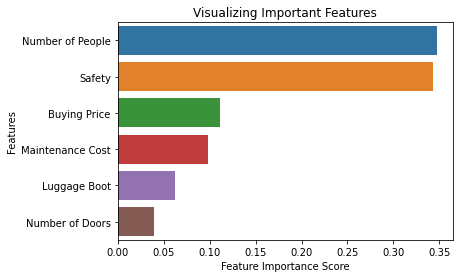

In [44]:
sns.barplot(x=feature_scores_rf, y=feature_scores_rf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Summary

In [45]:
myTable = PrettyTable(["Model", 
                       "Acc Train", 
                       "Acc Test", 
                       "Prec Train", 
                       "Prec Test", 
                       "Rec Train", 
                       "Rec Test", 
                       "F1 Score Train", 
                       "F1 Score Test"])
 
myTable.add_row(["LR","87 %","85 %","87 %","86 %","87 %","85 %","87 %","85 %"])
myTable.add_row(["DT","94 %","92 %","94 %","92 %","94 %","92 %","94 %","92 %"])
myTable.add_row(["RF","100","98 %","100","98 %","100","98 %","100","98 %"])

print(myTable)

+-------+-----------+----------+------------+-----------+-----------+----------+----------------+---------------+
| Model | Acc Train | Acc Test | Prec Train | Prec Test | Rec Train | Rec Test | F1 Score Train | F1 Score Test |
+-------+-----------+----------+------------+-----------+-----------+----------+----------------+---------------+
|   LR  |    87 %   |   85 %   |    87 %    |    86 %   |    87 %   |   85 %   |      87 %      |      85 %     |
|   DT  |    94 %   |   92 %   |    94 %    |    92 %   |    94 %   |   92 %   |      94 %      |      92 %     |
|   RF  |    100    |   98 %   |    100     |    98 %   |    100    |   98 %   |      100       |      98 %     |
+-------+-----------+----------+------------+-----------+-----------+----------+----------------+---------------+


1. Random Forest performed better out of the 3 models.
2. Whilst Logistic Regression outputs 'Safety' slightly ahead of 'Number of People', the much more accurate models, Decision Tree and Random Forest, outputs vice versa.